# Pre-processing the data obtained from the Karnataka Govt. website

## Importing the necessary libraries


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

## Reading the data

In [55]:
# Reading commodities
with open('commodities.json', 'r') as f:
    COMMODITIES = json.load(f)

def get_file_path(commodity_name, market_name):
    return f'./raw_data/{commodity_name.upper()}/krama_report_{market_name.lower()}.csv'

print(COMMODITIES)
print(get_file_path('RICE', 'Bengaluru'))

dataframes = {}

def concat_data(commodity):
    commodity = commodity.upper()
    commodity_df = pd.DataFrame()
    for market in COMMODITIES[commodity]:
        file_path = get_file_path(commodity, market)
        print(f'Reading {file_path}')
        df = pd.read_csv(file_path, encoding_errors='ignore')
        commodity_df = pd.concat([commodity_df, df])
        
    # Reset Index
    commodity_df.reset_index(drop=True, inplace=True)
    return commodity_df

for commodity in COMMODITIES:
    dataframes[commodity] = concat_data(commodity)

{'RICE': ['BENGALURU', 'BIDAR', 'MYSURU', 'SHIVAMOGGA'], 'WHEAT': ['BENGALURU', 'BIDAR', 'HUBBALLI', 'MYSURU', 'SHIVAMOGGA'], 'GROUNDNUT': ['BENGALURU', 'MYSURU', 'YADGIR'], 'GREEN PEAS': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA'], 'TUR DAL': ['BENGALURU', 'MYSURU', 'SHIVAMOGGA']}
./raw_data/RICE/krama_report_bengaluru.csv
Reading ./raw_data/RICE/krama_report_bengaluru.csv
Reading ./raw_data/RICE/krama_report_bidar.csv
Reading ./raw_data/RICE/krama_report_mysuru.csv
Reading ./raw_data/RICE/krama_report_shivamogga.csv
Reading ./raw_data/WHEAT/krama_report_bengaluru.csv
Reading ./raw_data/WHEAT/krama_report_bidar.csv
Reading ./raw_data/WHEAT/krama_report_hubballi.csv
Reading ./raw_data/WHEAT/krama_report_mysuru.csv
Reading ./raw_data/WHEAT/krama_report_shivamogga.csv
Reading ./raw_data/GROUNDNUT/krama_report_bengaluru.csv
Reading ./raw_data/GROUNDNUT/krama_report_mysuru.csv
Reading ./raw_data/GROUNDNUT/krama_report_yadgir.csv
Reading ./raw_data/GREEN PEAS/krama_report_bengaluru.csv
Reading ./

In [56]:
rice_df = dataframes['RICE']
wheat_df = dataframes['WHEAT']
groundnut_df = dataframes['GROUNDNUT']
green_peas_df = dataframes['GREEN PEAS']
tur_dal_df = dataframes['TUR DAL']

tur_dal_df.tail()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
2157,SHIVAMOGGA,26/12/2023,TUR DAL,AVERAGE,53,Quintal,15000,16500,15750,Shivamogga
2158,SHIVAMOGGA,27/12/2023,TUR DAL,AVERAGE,46,Quintal,15000,16500,15750,Shivamogga
2159,SHIVAMOGGA,28/12/2023,TUR DAL,AVERAGE,24,Quintal,15000,16500,15750,Shivamogga
2160,SHIVAMOGGA,29/12/2023,TUR DAL,AVERAGE,22,Quintal,15000,16500,15750,Shivamogga
2161,SHIVAMOGGA,30/12/2023,TUR DAL,AVERAGE,16,Quintal,15000,16500,15750,Shivamogga


## Describing the data

In [57]:
rice_df = concat_data('RICE')
rice_df.head()

Reading ./raw_data/RICE/krama_report_bengaluru.csv
Reading ./raw_data/RICE/krama_report_bidar.csv
Reading ./raw_data/RICE/krama_report_mysuru.csv
Reading ./raw_data/RICE/krama_report_shivamogga.csv


,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,BENGALURU,01/01/2021,MEDIUM,AVERAGE,17976,Quintal,4000,4400,4200,Bengaluru Urban
1,BENGALURU,02/01/2021,MEDIUM,AVERAGE,15170,Quintal,4000,4400,4200,Bengaluru Urban
2,BENGALURU,04/01/2021,MEDIUM,AVERAGE,20087,Quintal,4000,4400,4200,Bengaluru Urban
3,BENGALURU,05/01/2021,MEDIUM,AVERAGE,21127,Quintal,4000,4400,4200,Bengaluru Urban
4,BENGALURU,06/01/2021,MEDIUM,AVERAGE,18338,Quintal,4000,4400,4200,Bengaluru Urban


In [58]:
rice_df.describe()

,Arrivals,Min,Max,Modal
count,5835.000000,5835.000000,5835.000000,5835.000000
mean,3324.427935,3386.804970,4813.693573,4041.864096
std,7760.337319,1261.387926,2164.461477,1521.944778
min,1.000000,280.000000,1200.000000,955.000000
25%,98.000000,2324.000000,2800.000000,2500.000000
50%,165.000000,3500.000000,4800.000000,4100.000000
75%,610.000000,4000.000000,6000.000000,5200.000000
max,89173.000000,16363.000000,70000.000000,16500.000000


In [59]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    5835 non-null   object
 1   Date      5835 non-null   object
 2   Variety   5835 non-null   object
 3   Grade     5835 non-null   object
 4   Arrivals  5835 non-null   int64 
 5   Unit      5835 non-null   object
 6   Min       5835 non-null   int64 
 7   Max       5835 non-null   int64 
 8   Modal     5835 non-null   int64 
 9   District  5835 non-null   object
dtypes: int64(4), object(6)
memory usage: 456.0+ KB


## Cleaning the data

### Null values

In [60]:
def missing_values(df):
    print("The number of missing values in each column are:", df.isnull().sum())
    print("The number of missing values in the dataframe is:", df.isnull().sum().sum())
    
    # Drop rows with missing values
    df.dropna(inplace=True)
    print("The number of missing values after dropping rows with missing values is:", df.isnull().sum().sum())

missing_values(rice_df)

The number of missing values in each column are: Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64
The number of missing values in the dataframe is: 0
The number of missing values after dropping rows with missing values is: 0


Since arrivals hold no significance, we can remove the column.

### Converting Date to three columns: Day, Month, Year
We can use the split function to split the Date into three columns: Day, Month, and Year. We can then drop the Date column.

In [61]:
# Converting Date to three columns: year, month, day
def convert_date(df):
    date_format = r"%d/%m/%Y"
    df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df.drop('Date', axis=1, inplace=True)

convert_date(rice_df)
rice_df.head()
    

,Market,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Year,Month,Day
0,BENGALURU,MEDIUM,AVERAGE,17976,Quintal,4000,4400,4200,Bengaluru Urban,2021,1,1
1,BENGALURU,MEDIUM,AVERAGE,15170,Quintal,4000,4400,4200,Bengaluru Urban,2021,1,2
2,BENGALURU,MEDIUM,AVERAGE,20087,Quintal,4000,4400,4200,Bengaluru Urban,2021,1,4
3,BENGALURU,MEDIUM,AVERAGE,21127,Quintal,4000,4400,4200,Bengaluru Urban,2021,1,5
4,BENGALURU,MEDIUM,AVERAGE,18338,Quintal,4000,4400,4200,Bengaluru Urban,2021,1,6


### Checking for redundant columns

#### Arrivals 0 values

In [62]:
# Arrivals = 0
no_arrivals = rice_df[rice_df['Arrivals'] == 0]
no_arrivals = no_arrivals.shape[0]
print("The number of rows with no arrivals are:", no_arrivals)


The number of rows with no arrivals are: 0


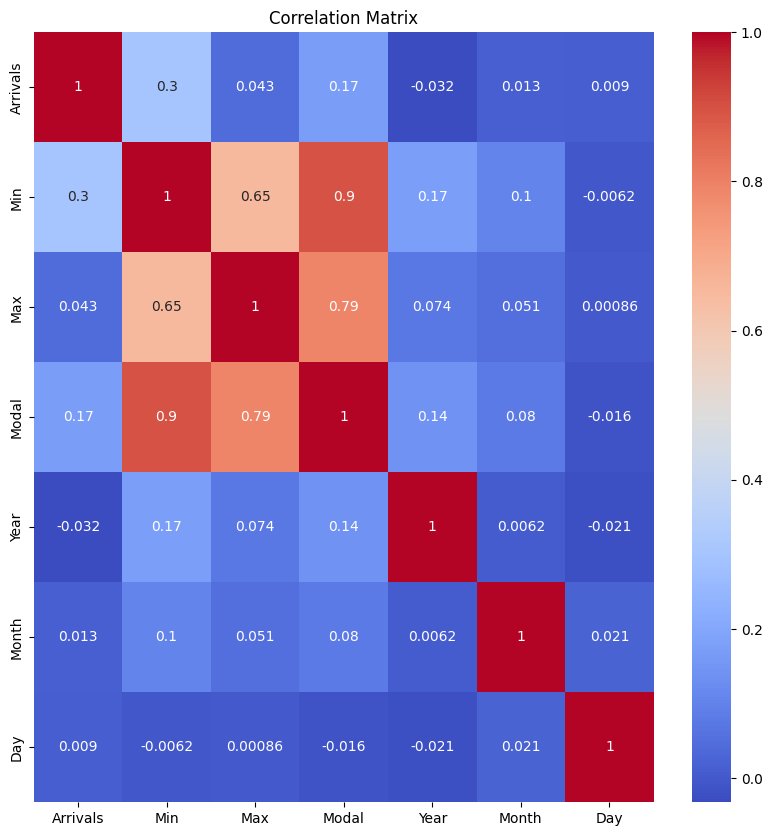

In [63]:
Correlation = rice_df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:
# We can check the number of unique values in each column
def unique_values(df):
    for column in df.columns:
        print(column, ":", df[column].nunique())

unique_values(rice_df)

Market : 4
Variety : 8
Grade : 1
Arrivals : 1864
Unit : 1
Min : 195
Max : 202
Modal : 200
District : 4
Year : 3
Month : 12
Day : 31


We can observe that the Market, Unit, Arrivals and District columns are redundant. We can drop these columns.

In [65]:
def remove_redundant_columns(df):
    red_cols = ["Unit", "District", "Arrivals"]
    df.drop(red_cols, axis=1, inplace=True)

remove_redundant_columns(rice_df)
rice_df.head()

,Market,Variety,Grade,Min,Max,Modal,Year,Month,Day
0,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,1
1,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,2
2,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,4
3,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,5
4,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,6


In [66]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Market   5835 non-null   object
 1   Variety  5835 non-null   object
 2   Grade    5835 non-null   object
 3   Min      5835 non-null   int64 
 4   Max      5835 non-null   int64 
 5   Modal    5835 non-null   int64 
 6   Year     5835 non-null   int32 
 7   Month    5835 non-null   int32 
 8   Day      5835 non-null   int32 
dtypes: int32(3), int64(3), object(3)
memory usage: 342.0+ KB


## Outliers Detection and Abnormalities Detection

### Outliers Detection

In [67]:
# Using Z-score to remove outliers
def find_zscore(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = pd.Series([(i-mean)/std for i in values])
    return np.abs(z_scores)

def remove_outliers(df):
    outlier_cols = ['Min', 'Max', 'Modal']
    for column in outlier_cols:
        z_scores = find_zscore(df[column])
        # Remove rows with z-score > 3
        df = df.iloc[np.where(z_scores < 3)]
    return df

print("The number of rows before removing outliers are:", rice_df.shape[0])
rice_df = remove_outliers(rice_df)
print("The number of rows after removing outliers are:", rice_df.shape[0])


The number of rows before removing outliers are: 5835
The number of rows after removing outliers are: 5763


### Abnormalities Detection

In [68]:
# Here abnormalities are mainly the data in which the logical expression min <= modal <= max is not satisfied.
def remove_abnormalities(df):
    df = df[df['Min'] <= df['Modal']]
    df = df[df['Modal'] <= df['Max']]
    return df

print("The number of rows before removing abnormalities are:", rice_df.shape[0])
rice_df = remove_abnormalities(rice_df)
print("The number of rows after removing abnormalities are:", rice_df.shape[0])

The number of rows before removing abnormalities are: 5763
The number of rows after removing abnormalities are: 5763


## Feature Engineering
We can create a Day of the week column, since Day, Month, and Year are already present in the dataset.


In [69]:
def create_day_of_week(df):
    df['DayOfWeek'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
    df['DayOfWeek'] = pd.to_datetime(df['DayOfWeek']).dt.dayofweek
    return df
rice_df = create_day_of_week(rice_df)
rice_df.head()

,Market,Variety,Grade,Min,Max,Modal,Year,Month,Day,DayOfWeek
0,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,1,4
1,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,2,5
2,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,4,0
3,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,5,1
4,BENGALURU,MEDIUM,AVERAGE,4000,4400,4200,2021,1,6,2


## Converting to a Standard format

### One-hot encoding the Variety and Grade columns

In [70]:
def one_hot_encode(df):
    categorical_cols = ["Variety", "Grade", "Market"]
    return pd.get_dummies(df, columns=categorical_cols, drop_first=False)

rice_df = one_hot_encode(rice_df)
rice_df.head()

,Min,Max,Modal,Year,Month,Day,DayOfWeek,Variety_BASUMATHI,Variety_BROKEN RICE,Variety_COARSE,Variety_CR 1009 (COARSE) BOILED,Variety_DAPPA,Variety_FINE,Variety_MEDIUM,Variety_SONA MANSOORI NON BASMATI,Grade_AVERAGE,Market_BENGALURU,Market_BIDAR,Market_MYSURU,Market_SHIVAMOGGA
0,4000,4400,4200,2021,1,1,4,False,False,False,False,False,False,True,False,True,True,False,False,False
1,4000,4400,4200,2021,1,2,5,False,False,False,False,False,False,True,False,True,True,False,False,False
2,4000,4400,4200,2021,1,4,0,False,False,False,False,False,False,True,False,True,True,False,False,False
3,4000,4400,4200,2021,1,5,1,False,False,False,False,False,False,True,False,True,True,False,False,False
4,4000,4400,4200,2021,1,6,2,False,False,False,False,False,False,True,False,True,True,False,False,False


### Converting to float

In [71]:
# Converting to float
rice_df = rice_df.astype(float)
rice_df.head()

,Min,Max,Modal,Year,Month,Day,DayOfWeek,Variety_BASUMATHI,Variety_BROKEN RICE,Variety_COARSE,Variety_CR 1009 (COARSE) BOILED,Variety_DAPPA,Variety_FINE,Variety_MEDIUM,Variety_SONA MANSOORI NON BASMATI,Grade_AVERAGE,Market_BENGALURU,Market_BIDAR,Market_MYSURU,Market_SHIVAMOGGA
0,4000.0,4400.0,4200.0,2021.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,4000.0,4400.0,4200.0,2021.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,4000.0,4400.0,4200.0,2021.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4000.0,4400.0,4200.0,2021.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4000.0,4400.0,4200.0,2021.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Standardizing the data

Since the column Arrivals ranges over a large scale, we can standardize the data.

In [72]:
# def standardize_arrivals(df):
#     from sklearn.preprocessing import StandardScaler
#     scaler = StandardScaler()
#     df[['Arrivals']] = scaler.fit_transform(df[['Arrivals']])

# standardize_arrivals(rice_df)
# rice_df.head()

## Complete preprocessing for all datasets

### Helper function

In [73]:
def preprocess(df):
    print("Preprocessing the dataframe")
    print()
    print("Handling missing values")
    missing_values(df)
    print()
    print("Converting Date to three columns: year, month, day")
    convert_date(df)
    print()
    print("Removing redundant columns")
    remove_redundant_columns(df)
    print()
    print("Creation of Day of Week column")
    df = create_day_of_week(df)
    print()
    print("One hot encoding categorical columns")
    df = one_hot_encode(df)
    print()
    print("Converting to float")
    df = df.astype(float)
    print()
    print("Removing outliers")
    print("The number of rows before removing outliers are:", df.shape[0])
    df = remove_outliers(df)
    print("The number of rows after removing outliers are:", df.shape[0])
    print()
    print("Removing abnormalities")
    print("The number of rows before removing abnormalities are:", df.shape[0])
    df = remove_abnormalities(df)
    print("The number of rows after removing abnormalities are:", df.shape[0])
    print()
    # print("Standardizing Arrivals")
    # standardize_arrivals(df)
    # print()
    return df

rice_df = concat_data('RICE')
rice_df = preprocess(rice_df)
rice_df.head()

Reading ./raw_data/RICE/krama_report_bengaluru.csv
Reading ./raw_data/RICE/krama_report_bidar.csv
Reading ./raw_data/RICE/krama_report_mysuru.csv
Reading ./raw_data/RICE/krama_report_shivamogga.csv
Preprocessing the dataframe

Handling missing values
The number of missing values in each column are: Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64
The number of missing values in the dataframe is: 0
The number of missing values after dropping rows with missing values is: 0

Converting Date to three columns: year, month, day

Removing redundant columns

Creation of Day of Week column

One hot encoding categorical columns

Converting to float

Removing outliers
The number of rows before removing outliers are: 5835
The number of rows after removing outliers are: 5763

Removing abnormalities
The number of rows before removing abnormalities are: 5763
The number of rows after removing abnorm

,Min,Max,Modal,Year,Month,Day,DayOfWeek,Variety_BASUMATHI,Variety_BROKEN RICE,Variety_COARSE,Variety_CR 1009 (COARSE) BOILED,Variety_DAPPA,Variety_FINE,Variety_MEDIUM,Variety_SONA MANSOORI NON BASMATI,Grade_AVERAGE,Market_BENGALURU,Market_BIDAR,Market_MYSURU,Market_SHIVAMOGGA
0,4000.0,4400.0,4200.0,2021.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,4000.0,4400.0,4200.0,2021.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,4000.0,4400.0,4200.0,2021.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4000.0,4400.0,4200.0,2021.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,4000.0,4400.0,4200.0,2021.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Cleaning the data and saving it

In [74]:
for commodity in COMMODITIES:
    df = concat_data(commodity)
    df = preprocess(df)
    df.to_csv(f'./processed_data/{commodity}/processed_krama_report.csv', index=False)

Reading ./raw_data/RICE/krama_report_bengaluru.csv
Reading ./raw_data/RICE/krama_report_bidar.csv
Reading ./raw_data/RICE/krama_report_mysuru.csv
Reading ./raw_data/RICE/krama_report_shivamogga.csv
Preprocessing the dataframe

Handling missing values
The number of missing values in each column are: Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64
The number of missing values in the dataframe is: 0
The number of missing values after dropping rows with missing values is: 0

Converting Date to three columns: year, month, day

Removing redundant columns

Creation of Day of Week column

One hot encoding categorical columns

Converting to float

Removing outliers
The number of rows before removing outliers are: 5835
The number of rows after removing outliers are: 5763

Removing abnormalities
The number of rows before removing abnormalities are: 5763
The number of rows after removing abnorm